In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# 문제 1. [사용자 행동 인식 데이터]에서 학습 데이터, 테스트 데이터, 학습 레이블, 테스트 레이블을 읽어오시오.
# 폴더명 : uci_human_activity
# 변수명 : x_train, x_test, y_train, y_test
x_train = pd.read_csv('uci_human_activity/train/X_train.txt', sep='\s+')
x_test = pd.read_csv('uci_human_activity/test/X_test.txt', sep='\s+')
y_train = pd.read_csv('uci_human_activity/train/y_train.txt', sep='\s+', names=['target'])
y_test = pd.read_csv('uci_human_activity/test/y_test.txt', sep='\s+', names=['target'])

In [3]:
x_train[:5]

,2.8858451e-001,-2.0294171e-002,-1.3290514e-001,-9.9527860e-001,-9.8311061e-001,-9.1352645e-001,-9.9511208e-001,-9.8318457e-001,-9.2352702e-001,-9.3472378e-001,...,-7.4323027e-002,-2.9867637e-001,-7.1030407e-001,-1.1275434e-001,3.0400372e-002,-4.6476139e-001,-1.8445884e-002,-8.4124676e-001,1.7994061e-001,-5.8626924e-002
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126


In [4]:
y_train[:5]

,target
0,5
1,5
2,5
3,5
4,5


In [5]:
x_test[:5]

,2.5717778e-001,-2.3285230e-002,-1.4653762e-002,-9.3840400e-001,-9.2009078e-001,-6.6768331e-001,-9.5250112e-001,-9.2524867e-001,-6.7430222e-001,-8.9408755e-001,...,7.1645446e-002,-3.3037044e-001,-7.0597388e-001,6.4624029e-003,1.6291982e-001,-8.2588562e-001,2.7115145e-001,-7.2000927e-001,2.7680104e-001,-5.7978304e-002
0,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
3,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
4,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,0.083603,-0.493517,-0.857565,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471


In [6]:
y_test[:5]

,target
0,5
1,5
2,5
3,5
4,5


In [25]:
# 문제 2. feature.txt 파일에서 중복된 피처명을 수정하시오.

# feature.txt 읽기
feature_name = pd.read_csv('uci_human_activity/features.txt',sep=' ' , names=['columns'])

# 중복된 데이터 추출
duplicate = feature_name[feature_name.duplicated()].drop_duplicates().values.reshape(-1)

# 중복된 데이터의 인덱스 추출
duplicate_index = np.array(feature_name['columns'][feature_name['columns'].isin(duplicate)].sort_values().index).reshape(-1,3)

# 중복 제거
for idx in duplicate_index:
    for cnt, i in enumerate(idx, 0):
        feature_name.iloc[i] += f'_{cnt}'

# x_train, x_test의 컬럼으로 적용
x_train = pd.read_csv('uci_human_activity/train/X_train.txt', sep='\s+', names=feature_name.values.reshape(-1))
x_test = pd.read_csv('uci_human_activity/test/X_test.txt', sep='\s+', names=feature_name.values.reshape(-1))

In [11]:
x_train[:5]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [12]:
x_test[:5]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [13]:
# 문제 3. 결정트리로 학습/예측/평가하시오.

In [14]:
# 결정트리 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습
dt_clf.fit(x_train, y_train)

# 예측
pred = dt_clf.predict(x_test)

# 평가
print(f'예측 정확도 : {accuracy_score(y_test, pred)}')

예측 정확도 : 0.8612147947064812


In [15]:
# 문제 4. 결정트리의 하이퍼파라미터를 조정하며, 학습/예측/평가하시오.
# 모델 : DecisionTreeClassifier

# 하이퍼파라미터
#'max_depth' : [ 5, 6, 7, 8, 9 , 10, 11, 12, 14, 16, 18, 20]
#'min_samples_split': [12, 14, 16, 18]

# 모델 성능 평가 지표 : accuracy

# 결정트리 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 하이퍼 파라미터 딕셔너리 생성
parameters = {
    'max_depth' : [5, 6, 7, 8, 9 , 10, 11, 12, 14, 16, 18, 20],
    'min_samples_split': [12, 14, 16, 18],
}

# GridSearchCV객체 생성
grid = GridSearchCV(
    dt_clf,
    param_grid=parameters,
    return_train_score=True
)

# 학습/예측/평가 실행
grid.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 18,
                                       20],
                         'min_samples_split': [12, 14, 16, 18]},
             return_train_score=True)

In [16]:
# 최적의 하이퍼 파라미터로 설정된 모델 저장
estimator = grid.best_estimator_

# 저장된 모델로 예측
pred = estimator.predict(x_test)

# 평가
print(f'예측 정확도 : {accuracy_score(y_test, pred)}')

예측 정확도 : 0.8683406854428232


In [31]:
# 문제 5.  문제4에서 학습된 모델의 주요 피처 상위 20개를 막대 그래프로 시각화하시오.
# 이미지 파일 첨부
importance = pd.DataFrame(estimator.feature_importances_, columns=['feature'], index=feature_name.values.reshape(-1)).sort_values(by='feature', ascending=False)[:20]
importance

,feature
tGravityAcc-min()-X,0.245833
fBodyAcc-mad()-X,0.206272
"angle(Y,gravityMean)",0.138791
fBodyAccMag-energy(),0.112050
"tGravityAcc-arCoeff()-Z,2",0.098533
fBodyGyro-maxInds-X,0.023259
"tBodyGyro-correlation()-Y,Z",0.016023
tGravityAcc-energy()-Y,0.015946
tGravityAccMag-arCoeff()1,0.015274
tBodyGyro-max()-X,0.008877


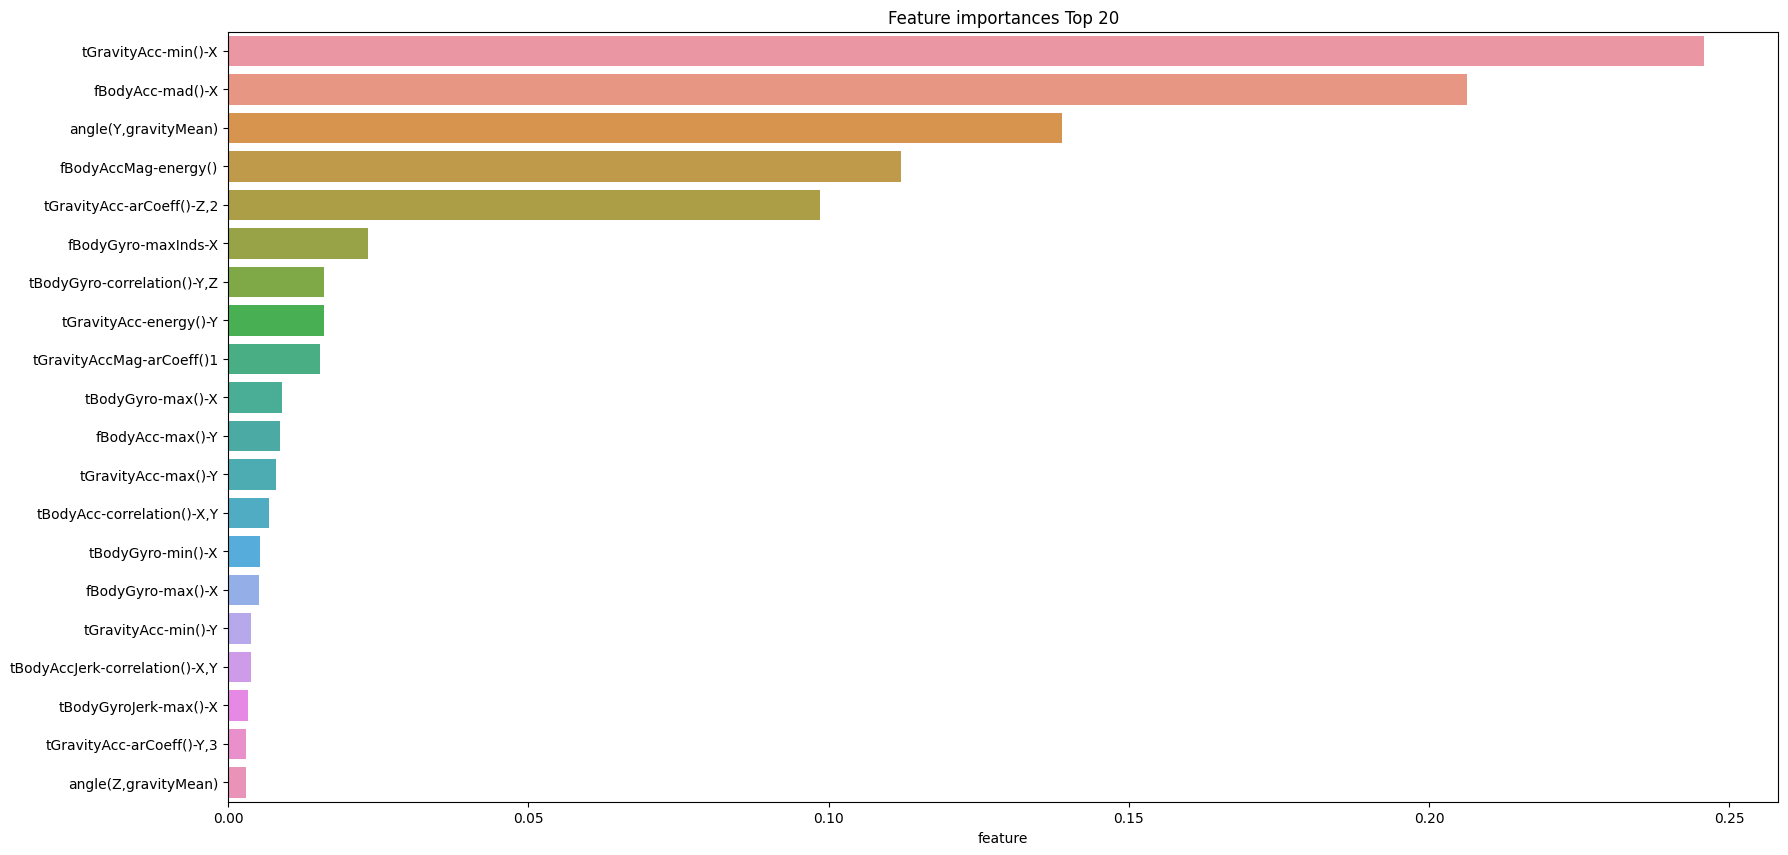

In [48]:
sns.barplot(
    importance,
    x=importance['feature'],
    y=importance.index,
    errorbar=None,
).figure.set_size_inches(20,10)

plt.title(
    label='Feature importances Top 20'
)


plt.savefig('Feature20.jpg')